In [10]:
import pandas as pd

df_hdi_unclean = pd.read_csv("hdr_general.csv", encoding="ISO-8859-1")
df_gini_unclean = pd.read_csv("gini-coefficient (1).csv")

In [11]:
#clean data
df_gini_unclean.dropna(subset=['Gini coefficient (before tax) (World Inequality Database)'], inplace=True)
df_gini = df_gini_unclean.drop(df_gini_unclean[df_gini_unclean['Country'].str.contains("(WID)", na=False, regex=False)].index)
df_gini.columns = ['country', 'year', 'gini_coefficent']

df_hdi = df_hdi_unclean[['country', 'year', 'hdi', 'life_expectancy', "mean_yr_school", 'expec_yr_school', 'gross_inc_percap']].copy().dropna()

#merge to single df where country and year are the same
df = df_hdi.merge(df_gini, on=['country', 'year'], how='inner')

-0.5108197722237492
R squared: 0.26093683969472303


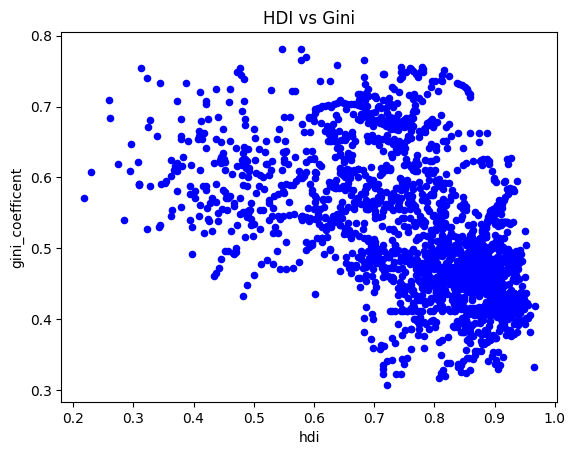

In [25]:
df.plot(kind='scatter', x='hdi', y='gini_coefficent', title="HDI vs Gini", color='blue')
correlation = df['hdi'].corr(df['gini_coefficent'])
print(correlation)
print(f"R squared: {correlation ** 2}")

-0.44071563713344547


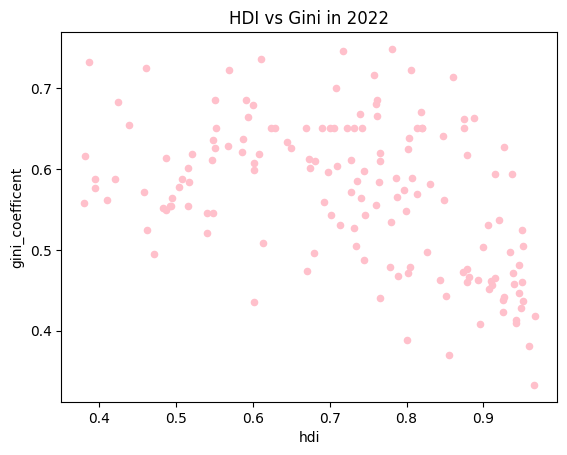

In [30]:
df_2022 = df[df['year'] == 2022]
df_2022.plot(kind='scatter', x='hdi', y='gini_coefficent', title="HDI vs Gini in 2022", color='pink')
correlation_2022 = df_2022['hdi'].corr(df['gini_coefficent'])
print(correlation_2022)

0.03161297052940462
R squared: 0.000999379905693005


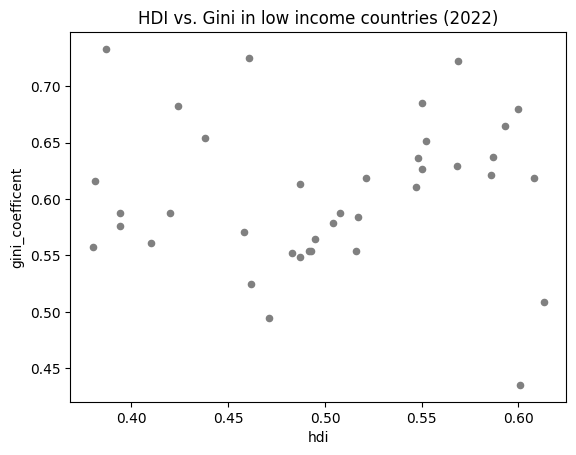

In [28]:
df_2022_low_inc = df_2022[df_2022['gross_inc_percap'] <= 4465]
df_2022_low_inc.plot(kind='scatter', x='hdi', y='gini_coefficent', title="HDI vs. Gini in low income countries (2022)", color='grey')
correlation_hdi_low_inc = df_2022_low_inc['hdi'].corr(df_2022_low_inc['gini_coefficent'])
print(correlation_hdi_low_inc)
print(f"R squared: {correlation_hdi_low_inc ** 2}")

-0.5110936426809469
R squared: 0.26121671158887944


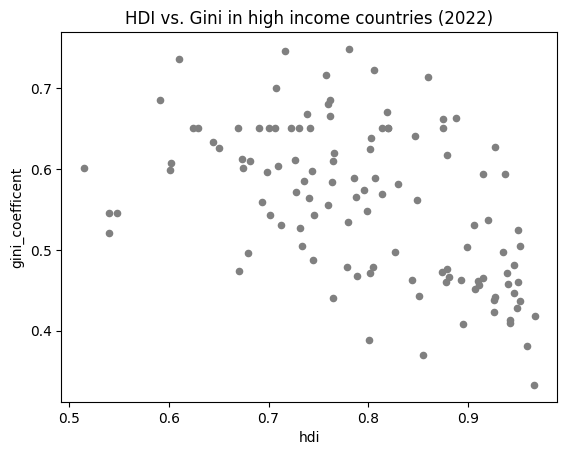

In [29]:
df_2022_high_inc = df_2022[df_2022['gross_inc_percap'] >= 4466]
df_2022_high_inc.plot(kind='scatter', x='hdi', y='gini_coefficent', title="HDI vs. Gini in high income countries (2022)", color='grey')
correlation_hdi_high_inc = df_2022_high_inc['hdi'].corr(df_2022_high_inc['gini_coefficent'])
print(correlation_hdi_high_inc)
print(f"R squared: {correlation_hdi_high_inc** 2}")

-0.4586252528809896
R squared: 0.21033712258015166


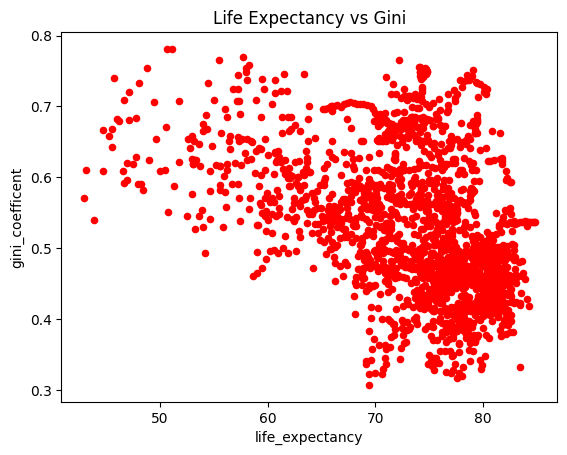

In [15]:
df.plot(kind='scatter', x='life_expectancy', y='gini_coefficent', title="Life Expectancy vs Gini", color='red')
correlation_life = df['life_expectancy'].corr(df['gini_coefficent'])
print(correlation_life)
print(f"R squared: {correlation_life ** 2}")

-0.4706195601911813
R squared: 0.2214827704345409


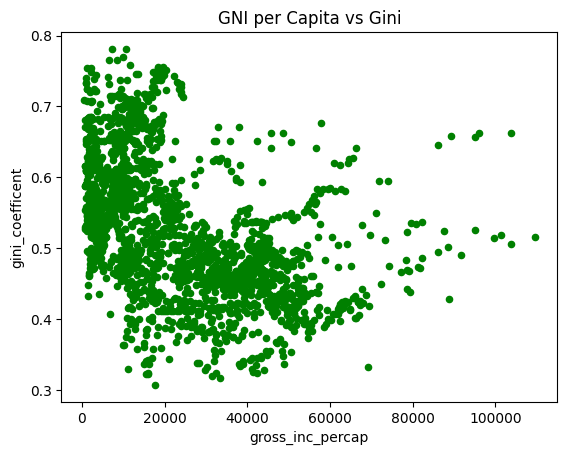

In [16]:
df.plot(kind='scatter', x='gross_inc_percap', y='gini_coefficent', title="GNI per Capita vs Gini", color='green')
correlation_gni = df['gross_inc_percap'].corr(df['gini_coefficent'])
print(correlation_gni)
print(f"R squared: {correlation_gni ** 2}")

-0.4935515326610973
R squared: 0.2435931153921182


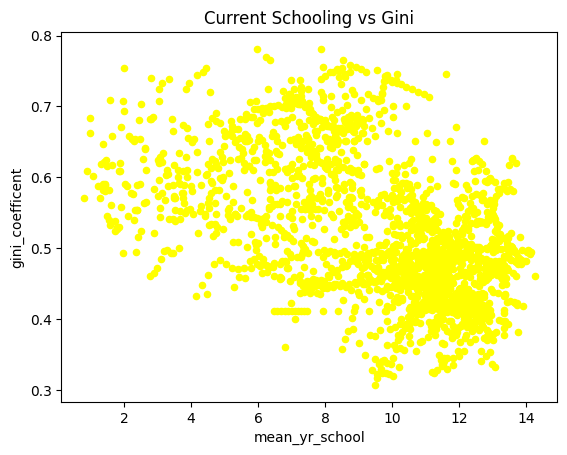

In [17]:
df.plot(kind='scatter', x='mean_yr_school', y='gini_coefficent', title="Current Schooling vs Gini", color='yellow')
correlation_cs = df['mean_yr_school'].corr(df['gini_coefficent'])
print(correlation_cs)
print(f"R squared: {correlation_cs ** 2}")

-0.4486099150716827
R squared: 0.20125085590062236


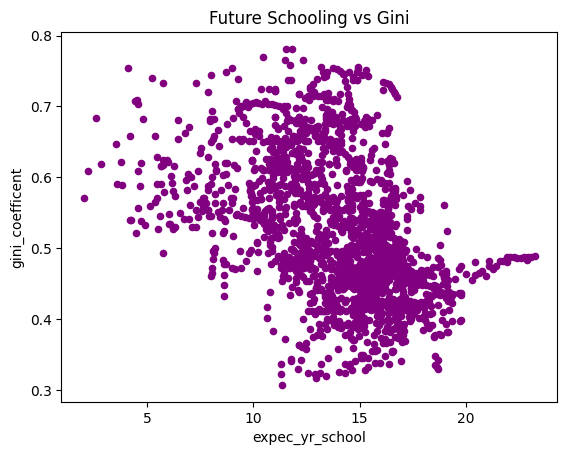

In [18]:
df.plot(kind='scatter', x='expec_yr_school', y='gini_coefficent', title="Future Schooling vs Gini", color='purple')
correlation_fs = df['expec_yr_school'].corr(df['gini_coefficent'])
print(correlation_fs)
print(f"R squared: {correlation_fs ** 2}")